In [ ]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [ ]:
!pip install lazypredict

In [1]:
import plotly.express as px
import pandas as pd
import numpy as np

coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEST/input_files/distan_lat42.896lon-8.415p4R4Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [2]:
import pandas as pd
import numpy as np

station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEST/input_files/LESTY2018Y2022.csv",
                          usecols =["time","wxcodes_o"],
                          parse_dates=["time"]).dropna().set_index("time")

pd.options.display.max_rows = 999
print("Weather frequencies\n")
station["wxcodes_o"].value_counts(normalize=True).map(lambda n: '{:.2%}'.format(n))

Weather frequencies



M                  73.21%
-RA                 6.38%
BCFG                5.29%
FG                  1.93%
BR                  1.70%
RA                  1.63%
-SHRA               1.60%
VCFG                1.29%
-DZ                 1.14%
SHRA                0.68%
-RA BR              0.54%
-RADZ               0.49%
-DZ BCFG            0.48%
-DZ BR              0.45%
-RA BCFG            0.39%
VCSH                0.24%
RA BR               0.17%
+RA                 0.16%
-RADZ BR            0.15%
-RADZ BCFG          0.15%
BCFG -DZ            0.15%
DZ BR               0.13%
-DZ FG              0.11%
PRFG                0.10%
DZ                  0.10%
+SHRA               0.09%
DZ BCFG             0.09%
FZFG                0.07%
MIFG                0.07%
VCTS                0.07%
TS                  0.06%
RA BCFG             0.06%
-TSRA               0.04%
BR -DZ              0.04%
-DZRA               0.04%
BCFG -RA            0.04%
FG -DZ              0.03%
BR -RA              0.03%
TSRA        

In [3]:
#label ra/dz

station["prec_l"] = "No RA/DZ"
mask = station['wxcodes_o'].str.contains("RA")
station.loc[mask,["prec_l"]] = "RA/DZ"
mask = station['wxcodes_o'].str.contains("DZ")
station.loc[mask,["prec_l"]] = "RA/DZ"

print(station.sample(50))
print("*****************************")
station["prec_l"].value_counts(normalize=True).transform(lambda x: '{:,.0%}'.format(x))

                    wxcodes_o    prec_l
time                                   
2018-08-07 09:30:00         M  No RA/DZ
2018-08-30 04:00:00         M  No RA/DZ
2019-05-05 01:30:00         M  No RA/DZ
2020-03-23 16:00:00         M  No RA/DZ
2021-08-10 19:30:00         M  No RA/DZ
2018-01-01 02:00:00         M  No RA/DZ
2019-08-25 19:00:00         M  No RA/DZ
2018-06-11 23:00:00         M  No RA/DZ
2022-04-16 18:30:00         M  No RA/DZ
2021-01-09 19:30:00         M  No RA/DZ
2018-12-18 00:30:00         M  No RA/DZ
2020-10-09 09:30:00      VCFG  No RA/DZ
2022-07-25 20:00:00         M  No RA/DZ
2020-08-26 21:00:00         M  No RA/DZ
2021-04-14 22:30:00         M  No RA/DZ
2020-04-09 03:00:00         M  No RA/DZ
2022-08-12 13:30:00         M  No RA/DZ
2021-10-13 00:00:00         M  No RA/DZ
2022-02-23 15:00:00         M  No RA/DZ
2019-02-10 23:30:00         M  No RA/DZ
2019-07-11 17:30:00         M  No RA/DZ
2018-04-06 07:00:00       -RA     RA/DZ
2019-12-23 08:30:00         M  No RA/DZ


No RA/DZ    84%
RA/DZ       16%
Name: prec_l, dtype: object

**Load model**

In [4]:
#Forecast d
#Load
mody2018 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEST/input_files/lat42.896lon-8.415p4R4KmD0Y2018.csv",parse_dates=["time"])
mody2019 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEST/input_files/lat42.896lon-8.415p4R4KmD0Y2019.csv",parse_dates=["time"])
mody2020 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEST/input_files/lat42.896lon-8.415p4R4KmD0Y2020.csv",parse_dates=["time"])
mody2021 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEST/input_files/lat42.896lon-8.415p4R4KmD0Y2021.csv",parse_dates=["time"])
mody2022 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEST/input_files/lat42.896lon-8.415p4R4KmD0Y2022.csv",parse_dates=["time"])
model1k = pd.concat([mody2018,mody2019,mody2020,mody2021,mody2022]).drop(columns=["Unnamed: 0"]).set_index("time")

model1k

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,...,cape3,cin3,cfh3,cfl3,cfm3,cft3,HGT5003,HGT8503,T5003,T8503
time,,,,,,,,,,,,,,,,,,,,,
2018-01-01 01:00:00,203.429932,0.0,854.856445,4.810002,11.869287,102894.039062,280.189117,0.941392,24051.365234,-0.485709,...,0.000000,-0.000477,0.2,0.000000,0.000000,0.200000,5556.550781,1547.730957,249.389938,273.540863
2018-01-01 02:00:00,215.205261,0.0,896.619629,5.700827,12.852463,102861.617188,280.347931,0.988324,24039.359375,-4.395393,...,26.730000,-14.053461,0.2,0.120898,0.000000,0.200000,5565.350098,1546.713013,249.959381,273.725189
2018-01-01 03:00:00,224.525986,0.0,921.870178,7.366050,16.131567,102839.406250,281.068298,0.952302,24040.320312,-3.568437,...,30.040001,-11.045238,0.2,0.164062,0.000000,0.200000,5573.533203,1546.541992,250.329880,273.646881
2018-01-01 04:00:00,227.065903,0.0,940.589844,8.982346,17.282509,102842.039062,281.655243,0.923813,24042.085938,-1.595969,...,32.810001,-8.397157,0.1,0.437500,0.000000,0.437500,5580.626953,1548.500977,250.527191,273.661194
2018-01-01 05:00:00,231.667892,0.0,983.509766,10.026832,18.146084,102827.226562,282.484192,0.924759,24040.648438,0.638913,...,58.730000,-4.643547,0.1,0.375000,0.000000,0.375000,5585.084961,1548.863037,250.680435,273.858765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,192.131683,0.0,1647.268433,8.436563,14.080066,101383.421875,283.931366,0.971286,4439.524902,6.396758,...,16.520000,-12.663813,0.1,0.484375,0.328125,0.484375,5534.582031,1469.921997,255.214996,277.491058
2022-12-31 20:00:00,210.602203,0.0,1613.758667,5.970586,9.454391,101500.343750,284.023376,0.981433,8239.185547,3.192404,...,50.250000,-0.009562,0.2,0.480000,0.203125,0.480000,5538.076172,1474.437012,255.085251,276.761200
2022-12-31 21:00:00,204.022858,0.0,1617.162964,7.379550,13.501737,101569.578125,284.019989,0.973716,9444.787109,3.996242,...,53.689999,-0.000937,0.1,0.439746,0.203125,0.439746,5541.597168,1477.406982,255.229691,276.760620


In [5]:
#concat station file versus meteorological model file same time
df_all1k = pd.concat([station,model1k],axis=1).drop(columns=["wxcodes_o"]).dropna()
df_all1k.sample(20)

,prec_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape3,cin3,cfh3,cfl3,cfm3,cft3,HGT5003,HGT8503,T5003,T8503
time,,,,,,,,,,,,,,,,,,,,,
2020-05-18 08:00:00,No RA/DZ,102.791367,0.0,2488.312988,2.124935,2.337277,102519.382812,288.729187,0.608986,24135.000000,...,0.000000,0.000003,0.118528,0.000000,0.000000,0.118528,5738.798340,1571.983643,257.816498,284.986237
2020-08-15 15:00:00,No RA/DZ,229.105011,0.0,2176.394531,8.223289,9.405080,101561.953125,292.841064,0.714288,24068.583984,...,191.399994,0.000813,0.000000,0.300000,0.000000,0.300000,5608.462891,1504.576050,256.024628,281.274750
2020-03-04 21:00:00,RA/DZ,217.917603,0.0,2032.363647,11.508668,17.441080,101323.562500,285.656494,0.996319,236.554382,...,12.330000,-2.201375,0.105469,0.708141,0.265625,0.708141,5577.926758,1476.416992,257.698761,280.019562
2021-12-20 03:00:00,No RA/DZ,103.580444,0.0,1829.523682,5.970762,11.591945,101791.460938,281.436432,0.789482,24167.957031,...,0.000000,0.002031,0.200000,0.000000,0.200000,0.200000,5553.172852,1499.553345,252.990067,279.639191
2019-06-08 04:00:00,No RA/DZ,96.429230,0.0,1244.139160,1.649758,2.842116,102477.781250,277.081177,1.000000,24051.322266,...,0.000000,-0.000387,0.179662,0.000000,0.083278,0.179662,5611.437012,1521.815186,256.414673,275.555756
2018-08-27 05:00:00,No RA/DZ,44.248863,0.0,2821.158447,2.392447,4.230489,101608.140625,285.843323,0.999989,24232.830078,...,0.000000,0.002500,0.000000,0.144376,0.000000,0.144376,5762.165039,1526.394409,263.997925,288.960052
2018-10-03 22:00:00,No RA/DZ,108.317917,0.0,2796.321533,1.532109,2.720746,102267.570312,288.950562,0.815957,24135.000000,...,0.000000,-0.001016,0.000000,0.000000,0.000000,0.000000,5796.967773,1581.818848,262.247925,288.047119
2020-03-10 02:00:00,No RA/DZ,174.740463,0.0,2297.761230,1.844301,2.910877,102843.453125,278.598572,0.978241,24056.402344,...,0.000000,-0.000006,0.351999,0.000000,0.000000,0.351999,5745.113770,1560.192627,260.473938,283.703491
2018-05-23 22:00:00,No RA/DZ,87.154053,0.0,2203.855225,2.338409,4.056357,101543.984375,287.109436,0.959176,24044.138672,...,74.580002,-153.231018,0.000000,0.000000,0.000000,0.000000,5629.503906,1516.854614,256.517181,284.959320


**Scatter plot significant meteorological variables and prec_l**

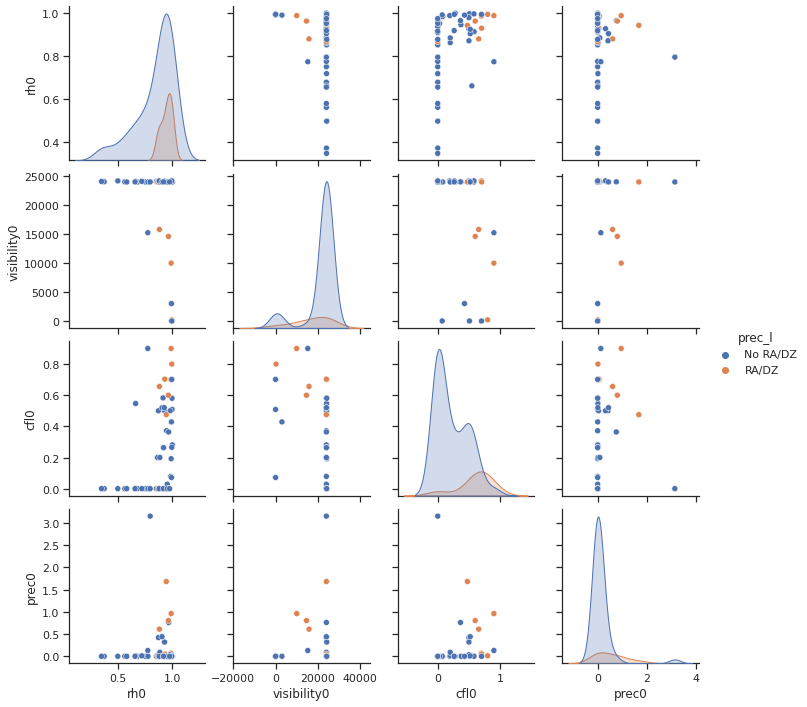

In [6]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df_all1k[["prec_l","rh0","visibility0","cfl0","prec0"]].sample(50), hue="prec_l");

**Scatter plot 3 PCA variables and prec_l**

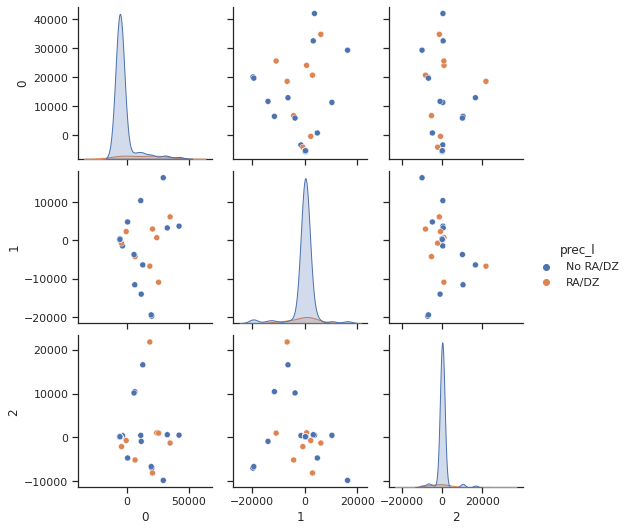

In [7]:
from sklearn.decomposition import PCA

df_pca = pd.DataFrame(PCA(n_components=3).fit_transform(df_all1k.iloc[:,1:]),
                                                        index =df_all1k.index)
df_pca["prec_l"] = df_all1k.prec_l
sns.pairplot(df_pca.sample(100), hue="prec_l");

**Meteorological model score Heidke Skill Score (HSS)**

In [8]:
from sklearn.metrics import classification_report

# HSS point 0
print("HSS point 0")
y_pred = np.asarray(["RA/DZ" if c>0 else "No RA/DZ" for c in df_all1k.prec0])
concat = pd.DataFrame({"y_pred":y_pred, "prec_l":df_all1k.prec_l})
cm = pd.crosstab(concat.prec_l,concat.y_pred ,margins=True,)
print(cm)
a = cm.values[0,0]
b = cm.values[1,0]
c = cm.values[0,1]
d = cm.values[1,1]
HSS_met0 = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
print("Heidke Skill Score:",round(HSS_met0,2))

print("\nQuality report Meteorological model point 0")
print(pd.DataFrame(classification_report(concat.prec_l, concat.y_pred,output_dict=True)).T)

# HSS point 1
print("\nHSS point 1")
y_pred = np.asarray(["RA/DZ" if c>0 else "No RA/DZ" for c in df_all1k.prec1])
concat = pd.DataFrame({"y_pred":y_pred, "prec_l":df_all1k.prec_l})
cm = pd.crosstab(concat.prec_l,concat.y_pred ,margins=True,)
print(cm)
a = cm.values[0,0]
b = cm.values[1,0]
c = cm.values[0,1]
d = cm.values[1,1]
HSS_met1 = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
print("Heidke Skill Score:",round(HSS_met1,2))

print("\nQuality report Meteorological model point 1")
print(pd.DataFrame(classification_report(concat.prec_l, concat.y_pred,output_dict=True)).T)

HSS point 0
y_pred    No RA/DZ  RA/DZ    All
prec_l                          
No RA/DZ     26642   9034  35676
RA/DZ          698   5293   5991
All          27340  14327  41667
Heidke Skill Score: 0.4

Quality report Meteorological model point 0
              precision    recall  f1-score       support
No RA/DZ       0.974470  0.746777  0.845563  35676.000000
RA/DZ          0.369442  0.883492  0.521016   5991.000000
accuracy       0.766434  0.766434  0.766434      0.766434
macro avg      0.671956  0.815134  0.683289  41667.000000
weighted avg   0.887477  0.766434  0.798899  41667.000000

HSS point 1
y_pred    No RA/DZ  RA/DZ    All
prec_l                          
No RA/DZ     26478   9198  35676
RA/DZ          784   5207   5991
All          27262  14405  41667
Heidke Skill Score: 0.39

Quality report Meteorological model point 1
              precision    recall  f1-score       support
No RA/DZ       0.971242  0.742180  0.841399  35676.000000
RA/DZ          0.361472  0.869137  0.51059

**Test association between observed variable and machine learning forecast (Pearson’s chi square test). Significance level (alpha) = 0.01**

In [9]:
from scipy.stats import chi2_contingency

#only cm point 1 similar point 0

#stadistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
sta, p, dof, exp = chi2_contingency(cm.iloc[0:2,0:2])

#degrees of freedoom (rows-1)*(columns-1) to test association between two variables
alpha = 0.01
print('\np-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Stadistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between machine learning forecast and observed values")
else:
    print("Retain H0,There is no association between machine learning forecast and observed values")


p-value: 0.0
Significance level: 0.01
Degres of of freedom:  1
Stadistic 8472.092364462103
Reject H0,There is an association between machine learning forecast and observed values


In [ ]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)


100%|██████████| 29/29 [01:10<00:00,  2.44s/it]


In [ ]:
models

**ML LGBMClassifier**

In [10]:
# variables X
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'dir2', 'snow_prec2', 'snowlevel2', 'mod2',
       'wind_gust2', 'mslp2', 'temp2', 'rh2', 'visibility2', 'lhflx2',
       'lwflx2', 'conv_prec2', 'prec2', 'swflx2', 'shflx2', 'cape2', 'cin2',
       'cfh2', 'cfl2', 'cfm2', 'cft2', 'HGT5002', 'HGT8502', 'T5002', 'T8502',
       'dir3', 'snow_prec3', 'snowlevel3', 'mod3', 'wind_gust3', 'mslp3',
       'temp3', 'rh3', 'visibility3', 'lhflx3', 'lwflx3', 'conv_prec3',
       'prec3', 'swflx3', '


Confusion matrix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      6558    556  7114
RA/DZ          383    837  1220
All           6941   1393  8334
Heidke Skill Score: 0.57

Quality report (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.944821  0.921844  0.933191  7114.000000
RA/DZ          0.600861  0.686066  0.640643  1220.000000
accuracy       0.887329  0.887329  0.887329     0.887329
macro avg      0.772841  0.803955  0.786917  8334.000000
weighted avg   0.894469  0.887329  0.890365  8334.000000

Confusion matrix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      6603    533  7136
RA/DZ          397    801  1198
All           7000   1334  8334
Heidke Skill Score: 0.57

Quality report (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.943286  0.925308  0.934211  7136.000000
RA/DZ          0.600450 

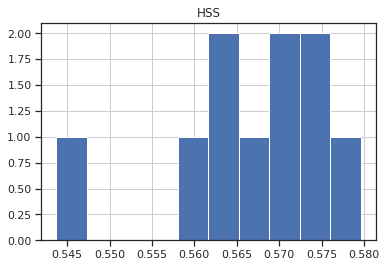

In [11]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

# loop random seed(1)
np.random.seed(1)
HSS_ml = []

for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #ml model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)
  #ml_model = BernoulliNB().fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion matrix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_ml.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_ml[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning stadistics")
# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000

print(pd.DataFrame(HSS_ml,columns=["HSS"]).describe())

sta, p = shapiro(HSS_ml)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_ml,columns=["HSS"]).hist();


**T test (1sample) compare machine learning HSS in a sample (n=10) versus meteorological model HSS at point 0 (0.4) and at point 1 (0.4). the alternative hypothesis is: the mean of HSS of the underlying distribution of the sample is greater than the given population HSS from meteorological model (popmean). Significance level (alpha) = 0.01**

In [12]:
import scipy.stats as stats

alpha = 0.01
sta0, p_value0 = stats.ttest_1samp(HSS_ml, popmean=0.4, alternative="greater")

print("\nalpha: ",alpha)
print("\nHSS list from machine learning test:",np.round(HSS_ml,2))
print("\np_value point 0:",p_value0)

if p_value0 < alpha:    
    print("\nwe are rejecting null hypothesis  H0:  HSS mean machine learning= HSS meteorological model point 0")
    print("\nwe are accepting alternative hypothesis: HSS mean machine learning is greater than HSS meteorological point 0")
else:
    print("\nwe are accepting null hypothesis:  H0 HSS mean machine learning = HSS meteorological model point 0")





alpha:  0.01

HSS list from machine learning test: [0.57 0.57 0.56 0.58 0.54 0.56 0.57 0.56 0.57 0.57]

p_value point 0: 7.021077254823608e-13

we are rejecting null hypothesis  H0:  HSS mean machine learning= HSS meteorological model point 0

we are accepting alternative hypothesis: HSS mean machine learning is greater than HSS meteorological point 0


**Add time features**

In [13]:
df_all1k["hour"] = df_all1k.index.hour
df_all1k["month"] = df_all1k.index.month
df_all1k["dayofyear"] = df_all1k.index.dayofyear
df_all1k["weekofyear"] = df_all1k.index.isocalendar().week.astype(int)

In [ ]:

# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)
models

In [15]:
# variables X
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0',
       ...
       'cfm3', 'cft3', 'HGT5003', 'HGT8503', 'T5003', 'T8503', 'hour', 'month',
       'dayofyear', 'weekofyear'],
      dtype='object', length=104)

**LGBMClassifier with time variables**


Confusion marix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      6595    519  7114
RA/DZ          398    822  1220
All           6993   1341  8334
Heidke Skill Score: 0.58

Quality report (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.943086  0.927045  0.934997  7114.000000
RA/DZ          0.612975  0.673770  0.641937  1220.000000
accuracy       0.889969  0.889969  0.889969     0.889969
macro avg      0.778031  0.800408  0.788467  8334.000000
weighted avg   0.894762  0.889969  0.892096  8334.000000

Confusion marix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      6632    504  7136
RA/DZ          396    802  1198
All           7028   1306  8334
Heidke Skill Score: 0.58

Quality report (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.943654  0.929372  0.936459  7136.000000
RA/DZ          0.614089  0

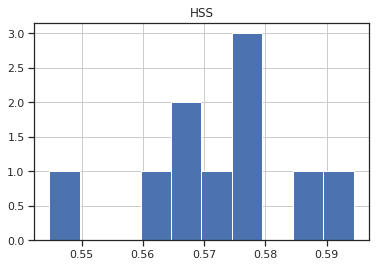

In [16]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

# loop random seed (1)
np.random.seed(1)
HSS_t = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #machine learning model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion marix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_t.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_t[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning stadistics")
print(pd.DataFrame(HSS_t,columns=["HSS"]).describe())

# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
sta, p = shapiro(HSS_t)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_t,columns=["HSS"]).hist();


**T test two related samples. This is a test for the null hypothesis that two related samples have identical HSS means. Alternative hypothesis the HSS mean of the distribution underlying the sample without time variables is less than the HSS mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [17]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(HSS_ml, HSS_t, alternative="less")

print("\nHSS without time variables:", np.round(HSS_ml,3))
print("\nHSS with time variables:", np.round(HSS_t,3))
print("\nalpha: ",alpha)
print("\np_value point: ",p_value)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables")
    print("\nwe are accepting alternative hypothesis: the HSS mean of the sample without time variables inputs is less than the HSS mean of the sample with time variables inputs")
else:
    print("\nwe are accepting null hypothesis:  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables")


HSS without time variables: [0.574 0.567 0.565 0.58  0.544 0.561 0.569 0.563 0.573 0.572]

HSS with time variables: [0.577 0.577 0.586 0.594 0.545 0.567 0.577 0.56  0.571 0.567]

alpha:  0.01

p_value point:  0.03865807061407146

we are accepting null hypothesis:  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables


In [18]:
feature_importances = ml_model.feature_importances_
total_sum = sum(feature_importances)
feature_importances_perc = [(importance/total_sum)*100 for importance in feature_importances]
# Print the feature importances as a percentage of total feature importance

for name, importance in zip(X.columns, feature_importances_perc):
    print(f"{name}: {importance:.1f}%")
     

dir0: 1.8%
snow_prec0: 0.0%
snowlevel0: 0.8%
mod0: 0.5%
wind_gust0: 0.9%
mslp0: 0.9%
temp0: 0.8%
rh0: 1.2%
visibility0: 1.1%
lhflx0: 0.9%
lwflx0: 0.9%
conv_prec0: 0.2%
prec0: 1.6%
swflx0: 0.9%
shflx0: 0.9%
cape0: 1.2%
cin0: 1.4%
cfh0: 1.2%
cfl0: 1.2%
cfm0: 0.9%
cft0: 1.2%
HGT5000: 0.9%
HGT8500: 0.7%
T5000: 0.8%
T8500: 0.8%
dir1: 1.1%
snow_prec1: 0.0%
snowlevel1: 0.7%
mod1: 0.9%
wind_gust1: 1.3%
mslp1: 1.0%
temp1: 0.9%
rh1: 1.4%
visibility1: 1.3%
lhflx1: 0.8%
lwflx1: 1.1%
conv_prec1: 0.7%
prec1: 1.6%
swflx1: 0.5%
shflx1: 1.0%
cape1: 1.0%
cin1: 1.5%
cfh1: 1.4%
cfl1: 1.1%
cfm1: 1.2%
cft1: 1.1%
HGT5001: 0.5%
HGT8501: 0.4%
T5001: 1.0%
T8501: 0.8%
dir2: 1.4%
snow_prec2: 0.0%
snowlevel2: 0.7%
mod2: 1.2%
wind_gust2: 0.7%
mslp2: 1.0%
temp2: 0.7%
rh2: 0.9%
visibility2: 1.2%
lhflx2: 0.8%
lwflx2: 1.1%
conv_prec2: 0.6%
prec2: 1.5%
swflx2: 0.7%
shflx2: 1.0%
cape2: 1.1%
cin2: 1.4%
cfh2: 1.9%
cfl2: 1.7%
cfm2: 1.2%
cft2: 1.8%
HGT5002: 0.6%
HGT8502: 0.8%
T5002: 0.9%
T8502: 0.7%
dir3: 0.9%
snow_prec3: 0.

****

**Save Machine learning model**

In [19]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("prec_LEST_d0.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=200))])


In [20]:
import sklearn
print(sklearn.__version__)
print(pd.__version__)

1.2.2
1.4.4


**ExtraTreesClassifier too big to be upload at github!!**


Confusion marix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      6525    589  7114
RA/DZ          303    917  1220
All           6828   1506  8334
Heidke Skill Score: 0.61

Quality report (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.955624  0.917206  0.936021  7114.000000
RA/DZ          0.608898  0.751639  0.672781  1220.000000
accuracy       0.892969  0.892969  0.892969     0.892969
macro avg      0.782261  0.834422  0.804401  8334.000000
weighted avg   0.904867  0.892969  0.897485  8334.000000

Confusion marix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      6618    546  7164
RA/DZ          295    875  1170
All           6913   1421  8334
Heidke Skill Score: 0.62

Quality report (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.957327  0.923786  0.940257  7164.000000
RA/DZ          0.615764  0

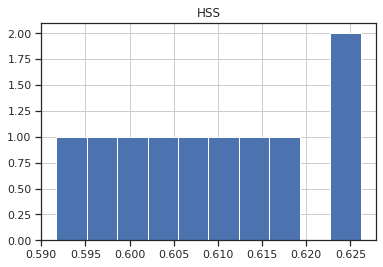

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

# loop random seed (1)
np.random.seed(1)
HSS_plus = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #machine learning model
  ml_model = ExtraTreesClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion marix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_plus.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_plus[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning stadistics")
print(pd.DataFrame(HSS_plus,columns=["HSS"]).describe())

# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
sta, p = shapiro(HSS_plus)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_plus,columns=["HSS"]).hist();

**T test two related samples. This is a test for the null hypothesis that two related samples have identical HSS means. Alternative hypothesis the HSS mean of the distribution underlying the sample without time variables is less than the HSS mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [22]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(HSS_t, HSS_plus, alternative="less")

print("\nHSS with LGBMClassifier:", np.round(HSS_t,3))
print("\nHSS with ExtraTreesClassifier:", np.round(HSS_plus,3))
print("\nalpha: ",alpha)
print("\np_value point: ",p_value)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: HSS mean LGBMClassifier = HSS mean ExtraTreesClassifier")
    print("\nwe are accepting alternative hypothesis: the HSS mean of the  LGBMClassifier is less than the HSS mean of ExtraTreesClassifier")
else:
    print("\nwe are accepting null hypothesis:  H0: LGBMClassifier = HSS mean ExtraTreesClassifier")


HSS with LGBMClassifier: [0.577 0.577 0.586 0.594 0.545 0.567 0.577 0.56  0.571 0.567]

HSS with ExtraTreesClassifier: [0.61  0.616 0.597 0.625 0.606 0.613 0.604 0.592 0.599 0.626]

alpha:  0.01

p_value point:  1.6914100698485684e-05

we are rejecting null hypothesis  H0: HSS mean LGBMClassifier = HSS mean ExtraTreesClassifier

we are accepting alternative hypothesis: the HSS mean of the  LGBMClassifier is less than the HSS mean of ExtraTreesClassifier
